In [3]:
from __future__ import division
import pandas as pd
import random

import matplotlib.pyplot as plt

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from wordcloud import WordCloud

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
import os
from math import log

In [4]:
def loadDataTest(path):
    df = pd.read_csv(path, thousands = ',')
    
    return df

## Combining reviews

In [5]:
# android_native_reviews_filename_combined = combine_review("android/native/", 'main_info_new.csv', "android_native" )
# android_xamarin_review_filename_combined = combine_review("android/Xamarin/", 'main_info_new.csv', "android_xamarin" )
# android_react_review_filename_combined = combine_review("android/react/", 'main_info_new.csv', "android_react" )

ios_native_reviews_filename_combined = combine_review_ios("ios/native/", 'main_info_new.csv', "ios_native" )
# ios_react_review_filename_combined = combine_review_ios("ios/react/", 'main_info_new.csv', "ios_react" )




NameError: name 'combine_review_ios' is not defined

In [14]:
app_name_category_df = pd.read_csv('ios/native/main_info_new.csv')
type(app_name_category_df.number_of_ratings[0])

numpy.float64

In [6]:
def combine_review_android(folder_name, main_info, framework_name):
    file_name = 'main_info_new.csv'
    
    combined_df = pd.DataFrame(columns = ['app_name', 'category', 'reviewer_ratings', 'review_body'])
    all_app_df = pd.DataFrame(columns=combined_df.columns)
    # Get all app names
    app_name_category_df = pd.read_csv(folder_name + file_name)

    # Skipping the main_info_new
    csv_list = [f for f in os.listdir(folder_name) if f.startswith('reviews')]
#     print(csv_list)
    for csv_name in csv_list:
    #       Get app name from file name
        app_name = csv_name.split('reviews_')[1].split('.csv')[0]
    #         Get the ratings and reviews columns
        df = pd.read_csv(os.path.join(folder_name, csv_name))[['reviewer_ratings', 'review_body']]
    #         Needed for merge
        df ['key'] = 0
    #         Get category and file name from main_info_new. Add no of reviews here. 
        app_category = (app_name_category_df.loc[app_name_category_df['app_name'] == app_name])[['app_name', 'category', 'number_of_downloads']]
        app_category['key'] = 0
    #         Inner join on both
        combined_df = app_category.merge(df, how = 'inner', on = 'key')
        combined_df.drop('key', 1, inplace = True)
        all_app_df = pd.concat([all_app_df, combined_df])
        
        for index, row in all_app_df.iterrows():
            if row['category'] in {'Communication', 'Photography', 'Medical', 'Music & Audio', 'Photography', 'Shopping', 'Tools', 'Travel & Local', 'Productivity', 'Art & Design', 'Video Players & Editors', 'House & Home' }:
                row['category'] = 'Utilities'
            elif row['category'] in {'Education', 'Entertainment', 'Food & Drink', 'Health & Fitness', 'Lifestyle', 'Social', 'Sports', 'Dating'}:
                row['category'] = 'Entertainment'
            elif row['category'] in {'Business', 'Events', 'Finance', 'News & Magazines', 'Weather'}:
                row['category'] = 'News'
            elif row['category'] in {'Adventure','Board', 'Educational', 'Puzzle', 'Racing', 'Arcade', 'Action', 'Card', 'Casino', 'Word', 'Casual'}:
                row['category'] = 'Games'

            #Update these values to whatever you need
            if row['number_of_downloads'] in {'100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', '100000+', '100,000+'}:
                row['number_of_downloads'] = 'low'
            elif row['number_of_downloads'] in {'500,000+', '5,000,000+', '1,000,000+'}:
                row['number_of_downloads'] = 'medium'
            elif row['number_of_downloads'] in {'10,000,000+', '50,000,000+', '100,000,000+'}:
                row['number_of_downloads'] = 'high'
            elif row['number_of_downloads'] in {'500,000,000+','1,000,000,000+','5,000,000,000+'}:
                row['number_of_downloads'] = 'very high'
                
                
    all_app_df.to_csv(folder_name+framework_name + '_combined.csv', index = False)
    return all_app_df

In [7]:
def combine_review_ios(folder_name, main_info, framework_name):
    file_name = 'main_info_new.csv'
    
    combined_df = pd.DataFrame(columns = ['app_name', 'category', 'reviewer_ratings', 'review_body'])
    all_app_df = pd.DataFrame(columns=combined_df.columns)
    # Get all app names
    app_name_category_df = pd.read_csv(folder_name + file_name)

    # Skipping the main_info_new
    csv_list = [f for f in os.listdir(folder_name) if f.startswith('reviews')]
    
    for csv_name in csv_list:
        print(csv_name)
    #       Get app name from file name
        app_name = csv_name.split('reviews_')[1].split('.csv')[0]
    #         Get the ratings and reviews columns
        df = pd.read_csv(os.path.join(folder_name, csv_name))[['reviewer_ratings', 'review_body']]
    #         Needed for merge
        df ['key'] = 0
    #         Get category and file name from main_info_new. Add no of reviews here. 
        app_category = (app_name_category_df.loc[app_name_category_df['app_name'] == app_name])[['app_name', 'category', 'number_of_ratings']]
        app_category['key'] = 0
    #         Inner join on both
        combined_df = app_category.merge(df, how = 'inner', on = 'key')
        combined_df.drop('key', 1, inplace = True)
        all_app_df = pd.concat([all_app_df, combined_df])
    # Android
        for index, row in all_app_df.iterrows():
    # ios
            if row['category'] in {'Photo & Video', 'Travel', 'Shopping', 'Music', 'Productivity'}:
                row['category'] = 'Utilities'
            elif row['category'] in {'Social Networking', 'Health & Fitness', 'Entertainment', 'Food & Drink', 'Lifestyle', 'Education'}:
                row['category'] = 'Entertainment'
            elif row['category'] in {'News', 'Weather', 'Finance', 'Business'}:
                row['category'] = 'News'
            
            #Update these values to whatever you need. ONLY FOR ANDROID
            if row['number_of_ratings'] < 10000:
                row['number_of_ratings'] = 'low'
            elif row['number_of_ratings'] >= 10000 and row['number_of_ratings'] < 100000:
                row['number_of_ratings'] = 'medium'
            elif row['number_of_ratings'] > 100000:
                row['number_of_ratings'] = 'high'

                
    all_app_df.to_csv(folder_name+framework_name + '_combined.csv', index = False)
    return all_app_df

## Distribution of start ratings

In [64]:
def print_subplot_popularity_1(df_native, df_react, df_xamarin, popularity_level): 
    labels = ['native', 'react', 'xamarin']

    x = np.arange(len(labels))  # the label locations
    bwidth = 0.5  # the width of the bars
    colors = ['#DAF7A6', '#FFC300','#FF5733']
    
    
    dist_native = (df_native.loc[df_native['number_of_downloads'] == popularity_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
    dist_react = (df_react.loc[df_react['number_of_downloads'] == popularity_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
    dist_xamarin = (df_xamarin.loc[df_xamarin['number_of_downloads'] == popularity_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
#     print(dist_xamarin)
    
    
    pos = []
    pos.append( dist_native.pos)
    pos.append( dist_react.pos)
    pos.append( dist_xamarin.pos)
    
    neu = []
    neu.append( dist_native.neu)
    neu.append( dist_react.neu)
    neu.append( dist_xamarin.neu)
    
    neg = []
    neg.append( dist_native.neg)
    neg.append( dist_react.neg)
    neg.append( dist_xamarin.neg)


    fig, ax = plt.subplots()
    ax.bar(range(3), pos, color=colors[0], width=bwidth , label='positive',edgecolor='white')
    ax.bar(range(3), neu,bottom=np.array(pos), color=colors[1],  width=bwidth, label='neutral',edgecolor='white')
    ax.bar(range(3), neg,bottom=np.array(pos)+np.array(neu), color=colors[2],  width=bwidth, label='Negative',edgecolor='white')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_ylabel('% Reviews')
    ax.set_title('Sentiment analysis with popularity: ' + popularity_level)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    return plt

In [65]:
def print_subplot_popularity_2(df_native, df_react, popularity_level): 
    labels = ['native', 'react']

    x = np.arange(len(labels))  # the label locations
    bwidth = 0.5  # the width of the bars
    colors = ['#DAF7A6', '#FFC300','#FF5733']
    
    
    dist_native = (df_native.loc[df_native['number_of_downloads'] == popularity_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
    dist_react = (df_react.loc[df_react['number_of_downloads'] == popularity_level])['rating_category'].value_counts(normalize=True, ascending=True)*100

    
    pos = []    
    neu = []    
    neg = []
    
    pos.append( dist_native.pos)
    pos.append( dist_react.pos)
    neu.append( dist_native.neu)
    neu.append( dist_react.neu)
    neg.append( dist_native.neg)
    neg.append( dist_react.neg)
    
    fig, ax = plt.subplots()
    ax.bar(range(2), pos, color=colors[0], width=bwidth , label='positive', edgecolor='white')
    ax.bar(range(2), neu,bottom=np.array(pos), color=colors[1],  width=bwidth, label='neutral',edgecolor='white')
    ax.bar(range(2), neg,bottom=np.array(pos)+np.array(neu), color=colors[2],  width=bwidth, label='Negative',edgecolor='white')
    
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('% Reviews')
    ax.set_title('Sentiment analysis with popularity: ' + popularity_level)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    return plt

In [66]:
def print_subplot_category_1(df_native, df_react, df_xamarin, category_level): 
    labels = ['native', 'react', 'xamarin']

    x = np.arange(len(labels))  # the label locations
    bwidth = 0.5  # the width of the bars
    colors = ['#DAF7A6', '#FFC300','#FF5733']
    
    
    dist_native = (df_native.loc[df_native['category'] == category_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
    dist_react = (df_react.loc[df_react['category'] == category_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
    dist_xamarin = (df_xamarin.loc[df_xamarin['category'] == category_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
#     print(dist_native)
    
    
    pos = []
    pos.append( dist_native.pos)
    pos.append( dist_react.pos)
    pos.append( dist_xamarin.pos)
    
    neu = []
    neu.append( dist_native.neu)
    if(len(dist_react) == 2):
        neu.append(0)
    else:
        neu.append( dist_react.neu)
    neu.append( dist_xamarin.neu)
    
    neg = []
    neg.append( dist_native.neg)
    neg.append( dist_react.neg)
    neg.append( dist_xamarin.neg)


    fig, ax = plt.subplots()
    ax.bar(range(3), pos, color=colors[0], width=bwidth , label='positive',edgecolor='white')
    ax.bar(range(3), neu,bottom=np.array(pos), color=colors[1],  width=bwidth, label='neutral',edgecolor='white')
    ax.bar(range(3), neg,bottom=np.array(pos)+np.array(neu), color=colors[2],  width=bwidth, label='Negative',edgecolor='white')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('% Reviews')
    ax.set_title('Sentiment analysis with Gategory: ' + category_level)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    return plt

In [67]:
def print_subplot_category_2(df_native, df_react, category_level): 
    labels = ['native', 'react']

    x = np.arange(len(labels))  # the label locations
    bwidth = 0.5  # the width of the bars
    colors = ['#DAF7A6', '#FFC300','#FF5733']
    
    
    dist_native = (df_native.loc[df_native['category'] == category_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
    dist_react = (df_react.loc[df_react['category'] == category_level])['rating_category'].value_counts(normalize=True, ascending=True)*100
#     print(type(dist_react))
    
    
    pos = []
    pos.append( dist_native.pos)
    pos.append( dist_react.pos)
    
    neu = []
    neu.append( dist_native.neu)
    
    if(len(dist_react) == 2):
        neu.append(0)
    else:
        neu.append( dist_react.neu)
    
    neg = []
    neg.append( dist_native.neg)
    neg.append( dist_react.neg)
    
#     print(pos)
#     print(neg)
#     print(neu)


    fig, ax = plt.subplots()
    ax.bar(range(2), pos, color=colors[0], width=bwidth , label='positive',edgecolor='white')
    ax.bar(range(2), neu,bottom=np.array(pos), color=colors[1],  width=bwidth, label='neutral',edgecolor='white')
    ax.bar(range(2), neg,bottom=np.array(pos)+np.array(neu), color=colors[2],  width=bwidth, label='Negative',edgecolor='white')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('% Reviews')
    ax.set_title('Sentiment analysis with Gategory: ' + category_level)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    return plt

In [68]:
#adding column in the df for rating category
def sentiment(row):
    if row['reviewer_ratings'] > 3:
        return "pos"
    if row['reviewer_ratings'] < 3:
        return "neg"
    if row['reviewer_ratings'] == 3:
        return "neu"
    return "na"
    

In [38]:
android_native_reviews_filename = "android/native/"+ "android_native_combined.csv"
android_react_review_filename = "android/react/"+  "android_react_combined.csv"
android_xamarin_review_filename = "android/xamarin/" + "android_xamarin_combined.csv"

# ios_native_reviews_filename = "ios/native/"+ "ios_native_combined.csv"
# ios_react_review_filename = "ios/react/"+ "ios_react_combined.csv"



android_native_without_sentiment_df = loadDataTest(android_native_reviews_filename)
android_react_without_sentiment_df = loadDataTest(android_react_review_filename)
android_xamarin_without_sentiment_df = loadDataTest(android_xamarin_review_filename)

# ios_native_without_sentiment_df = loadDataTest(ios_native_reviews_filename)
# ios_react_without_sentiment_df = loadDataTest(ios_react_review_filename)



android_native_without_sentiment_df['rating_category'] = android_native_without_sentiment_df.apply(lambda row: sentiment(row), axis=1)
android_react_without_sentiment_df['rating_category'] = android_react_without_sentiment_df.apply(lambda row: sentiment(row), axis=1)
android_xamarin_without_sentiment_df['rating_category'] = android_xamarin_without_sentiment_df.apply(lambda row: sentiment(row), axis=1)

# ios_native_without_sentiment['rating_category'] = ios_native_without_sentiment.apply(lambda row: sentiment(row), axis=1)
# ios_react_without_sentiment['rating_category'] = ios_react_without_sentiment.apply(lambda row: sentiment(row), axis=1)

In [42]:
len((android_react_without_sentiment_df.loc[android_react_without_sentiment_df['category'] == "Games"])['rating_category'].value_counts(normalize=True, ascending=True))

2

<module 'matplotlib.pyplot' from 'C:\\Users\\gupta\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

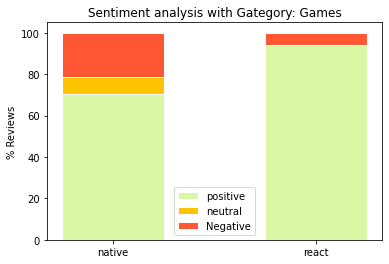

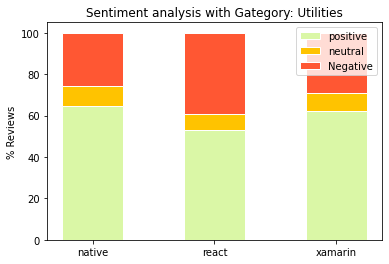

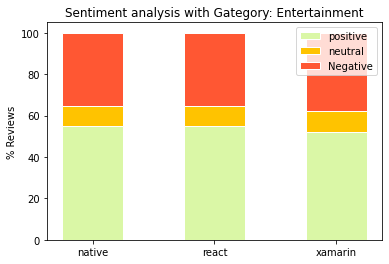

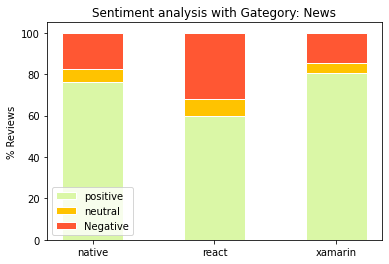

In [69]:
print_subplot_category_2(android_native_without_sentiment_df, android_react_without_sentiment_df, "Games" )
print_subplot_category_1(android_native_without_sentiment_df, android_react_without_sentiment_df, android_xamarin_without_sentiment_df, "Utilities" )
print_subplot_category_1(android_native_without_sentiment_df, android_react_without_sentiment_df, android_xamarin_without_sentiment_df,"Entertainment" )
print_subplot_category_1(android_native_without_sentiment_df, android_react_without_sentiment_df, android_xamarin_without_sentiment_df,"News" )

# print_subplot_popularity(ios_native_without_sentiment_df, ios_react_without_sentiment, ios_xamarin_without_sentiment, "low" )
# print_subplot_popularity(ios_native_without_sentiment_df, ios_react_without_sentiment, ios_xamarin_without_sentiment, "medium" )


<module 'matplotlib.pyplot' from 'C:\\Users\\gupta\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

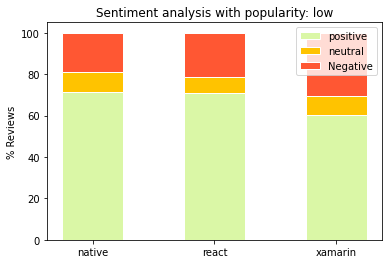

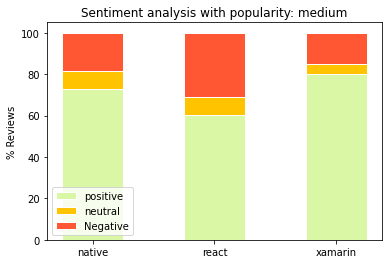

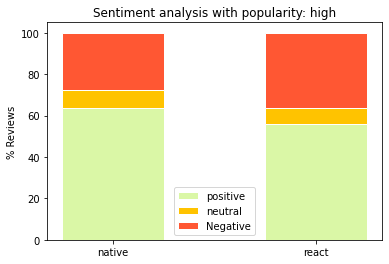

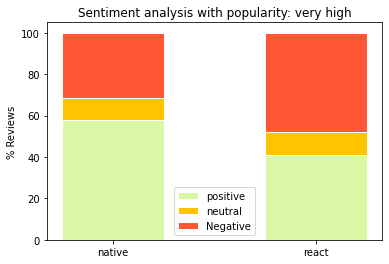

In [70]:
print_subplot_popularity_1(android_native_without_sentiment_df, android_react_without_sentiment_df, android_xamarin_without_sentiment_df, "low" )
print_subplot_popularity_1(android_native_without_sentiment_df, android_react_without_sentiment_df, android_xamarin_without_sentiment_df, "medium" )
print_subplot_popularity_2(android_native_without_sentiment_df, android_react_without_sentiment_df, "high" )
print_subplot_popularity_2(android_native_without_sentiment_df, android_react_without_sentiment_df, "very high" )

# print_subplot_popularity(ios_native_without_sentiment_df, ios_react_without_sentiment, ios_xamarin_without_sentiment, "low" )
# print_subplot_popularity(ios_native_without_sentiment_df, ios_react_without_sentiment, ios_xamarin_without_sentiment, "medium" )
# print_subplot_popularity(ios_native_without_sentiment_df, ios_react_without_sentiment, ios_xamarin_without_sentiment, "high" )



## Analysis of main_info files

In [84]:
df_android_native_main_info = loadDataTest("android/native/main_info_new.csv")
df_android_react_main_info = loadDataTest("android/react/main_info_new.csv")
df_android_xamarin_main_info = loadDataTest("android/xamarin/main_info_new.csv")

### number of ratings for each popularity category

In [86]:
def label_popularity (row):

    if row['number_of_downloads'] in {'100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', '100000+', '100,000+'}:
        return 'low'
    elif row['number_of_downloads'] in {'500,000+', '5,000,000+', '1,000,000+'}:
        return 'medium'
    elif row['number_of_downloads'] in {'10,000,000+', '50,000,000+', '100,000,000+'}:
        return 'high'
    elif row['number_of_downloads'] in {'500,000,000+','1,000,000,000+','5,000,000,000+'}:
        return 'very high'
    
    return "NA"

In [87]:
def label_category (row):

    if row['category'] in {'Communication', 'Photography', 'Medical', 'Music & Audio', 'Photography', 'Shopping', 'Tools', 'Travel & Local', 'Productivity', 'Art & Design', 'Video Players & Editors', 'House & Home' }:
        return 'Utilities'
    elif row['category'] in {'Education', 'Entertainment', 'Food & Drink', 'Health & Fitness', 'Lifestyle', 'Social', 'Sports', 'Dating'}:
        return 'Entertainment'
    elif row['category'] in {'Business', 'Events', 'Finance', 'News & Magazines', 'Weather'}:
        return 'News'
    elif row['category'] in {'Adventure','Board', 'Educational', 'Puzzle', 'Racing', 'Arcade', 'Action', 'Card', 'Casino', 'Word', 'Casual'}:
        return 'Games'
    
    return "NA"

In [88]:
def avg_no_of_ratings_1(df):
    num_apps_popularity = [0,0,0,0]
    num_rating_popularity = [0,0,0,0]
    avg_rating_popularity = [0,0,0,0]

    for index, row in df.iterrows():
        if row['number_of_downloads_category'] == 'low':
            num_apps_popularity[0] += 1
            num_rating_popularity[0] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 'medium':
            num_apps_popularity[1] += 1
            num_rating_popularity[1] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 'high':
            num_apps_popularity[2] += 1
            num_rating_popularity[2] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 'very high':
            num_apps_popularity[3] += 1
            num_rating_popularity[3] += row['number_of_ratings']

    print(num_rating_popularity)
    print(num_apps_popularity)

    return [x/y for x, y in zip(num_rating_popularity, num_apps_popularity)]


In [89]:
def avg_no_of_ratings_2(df):
    num_apps_popularity = [0,0]
    num_rating_popularity = [0,0]
    avg_rating_popularity = [0,0]

    for index, row in df.iterrows():
        if row['number_of_downloads_category'] == 'low':
            num_apps_popularity[0] += 1
            num_rating_popularity[0] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 'medium':
            num_apps_popularity[1] += 1
            num_rating_popularity[1] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 'high':
            num_apps_popularity[2] += 1
            num_rating_popularity[2] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 'very high':
            num_apps_popularity[3] += 1
            num_rating_popularity[3] += row['number_of_ratings']

    print(num_rating_popularity)
    print(num_apps_popularity)

    return [x/y for x, y in zip(num_rating_popularity, num_apps_popularity)]


In [93]:
def avg_no_of_ratings_3(df):
    num_apps_popularity = [0,0,0,0]
    num_rating_popularity = [0,0,0,0]
    avg_rating_popularity = [0,0,0,0]

    for index, row in df.iterrows():
        if row['new_category'] == 'Utilities':
            num_apps_popularity[0] += 1
            num_rating_popularity[0] += row['number_of_ratings']
        if row['new_category'] == 'Entertainment':
            num_apps_popularity[1] += 1
            num_rating_popularity[1] += row['number_of_ratings']
        if row['new_category'] == 'News':
            num_apps_popularity[2] += 1
            num_rating_popularity[2] += row['number_of_ratings']
        if row['new_category'] == 'Games':
            num_apps_popularity[3] += 1
            num_rating_popularity[3] += row['number_of_ratings']

    print(num_rating_popularity)
    print(num_apps_popularity)

    return [x/y for x, y in zip(num_rating_popularity, num_apps_popularity)]


In [99]:
def avg_no_of_ratings_4(df):
    num_apps_popularity = [0,0,0]
    num_rating_popularity = [0,0,0]
    avg_rating_popularity = [0,0,0]

    for index, row in df.iterrows():
        if row['new_category'] == 'Utilities':
            num_apps_popularity[0] += 1
            num_rating_popularity[0] += row['number_of_ratings']
        if row['new_category'] == 'Entertainment':
            num_apps_popularity[1] += 1
            num_rating_popularity[1] += row['number_of_ratings']
        if row['new_category'] == 'News':
            num_apps_popularity[2] += 1
            num_rating_popularity[2] += row['number_of_ratings']
        if row['new_category'] == 'Games':
            num_apps_popularity[3] += 1
            num_rating_popularity[3] += row['number_of_ratings']

    print(num_rating_popularity)
    print(num_apps_popularity)

    return [x/y for x, y in zip(num_rating_popularity, num_apps_popularity)]


In [91]:
df_android_native_main_info["number_of_downloads_category"] = df_android_native_main_info.apply (lambda row: label_popularity(row), axis=1)
df_android_react_main_info["number_of_downloads_category"] = df_android_react_main_info.apply (lambda row: label_popularity(row), axis=1)
df_android_xamarin_main_info["number_of_downloads_category"] = df_android_xamarin_main_info.apply (lambda row: label_popularity(row), axis=1)

df_android_native_main_info["new_category"] = df_android_native_main_info.apply (lambda row: label_category(row), axis=1)
df_android_react_main_info["new_category"] = df_android_react_main_info.apply (lambda row: label_category(row), axis=1)
df_android_xamarin_main_info["new_category"] = df_android_xamarin_main_info.apply (lambda row: label_category(row), axis=1)

In [58]:
no_of_ratings_native = avg_no_of_ratings_1(df_android_native_main_info)
no_of_ratings_react = avg_no_of_ratings_1(df_android_react_main_info)
no_of_ratings_xamarin = avg_no_of_ratings_2(df_android_xamarin_main_info)

no_of_ratings_native = [log(y,10) for y in no_of_ratings_native]
no_of_ratings_react = [log(y,10) for y in no_of_ratings_react]
no_of_ratings_xamarin = [log(y,10) for y in no_of_ratings_xamarin]

no_of_ratings_xamarin.append(0)
no_of_ratings_xamarin.append(0)

[16720, 866839, 65300909, 96154753]
[3, 15, 37, 14]
[13302.0, 130979.0, 12125541.0, 109230397.0]
[16, 6, 6, 2]
[15899, 170632]
[52, 4]


In [101]:
no_of_ratings_native = avg_no_of_ratings_3(df_android_native_main_info)
no_of_ratings_react = avg_no_of_ratings_3(df_android_react_main_info)
no_of_ratings_xamarin = avg_no_of_ratings_4(df_android_xamarin_main_info)

no_of_ratings_native = [log(y,10) for y in no_of_ratings_native]
no_of_ratings_react = [log(y,10) for y in no_of_ratings_react]
no_of_ratings_xamarin = [log(y,10) for y in no_of_ratings_xamarin]

no_of_ratings_xamarin.append(0)


In [103]:
no_of_ratings_react

[6.120524666496349, 7.232364760662961, 4.34868770433775, 1.2671717284030135]

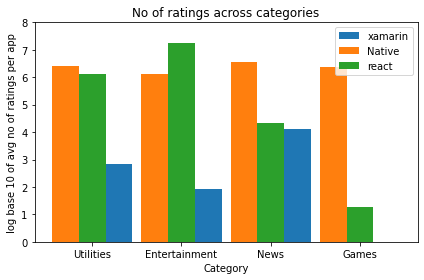

In [104]:
labels = ['Utilities', 'Entertainment', 'News', 'Games']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rect2 = ax.bar(x + width, no_of_ratings_xamarin, width, label='xamarin')
rects1 = ax.bar(x - width, no_of_ratings_native, width, label='Native')
rects2 = ax.bar(x, no_of_ratings_react, width, label='react')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('log base 10 of avg no of ratings per app')
ax.set_xlabel('Category')
ax.set_title('No of ratings across categories')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0, 8])  


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

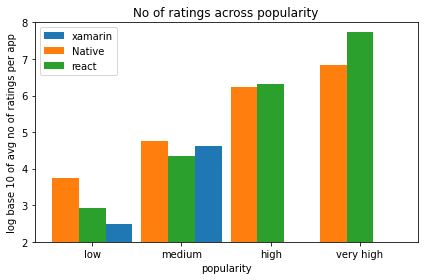

In [71]:
labels = ['low', 'medium', 'high', 'very high']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rect2 = ax.bar(x + width, no_of_ratings_xamarin, width, label='xamarin')
rects1 = ax.bar(x - width, no_of_ratings_native, width, label='Native')
rects2 = ax.bar(x, no_of_ratings_react, width, label='react')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('log base 10 of avg no of ratings per app')
ax.set_xlabel('popularity')
ax.set_title('No of ratings across popularity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([2, 8])  


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

## Word Cloud

#### Manual cleaning, Stop word removal, punctuation removal, stemming

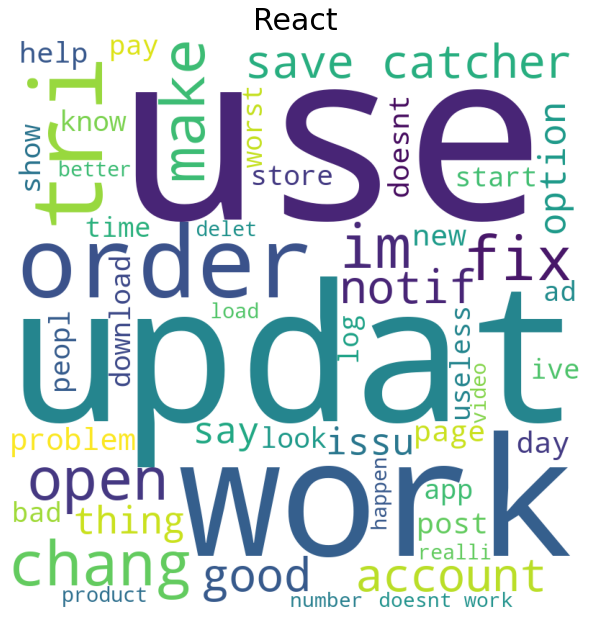

In [121]:
# df_combined_react = loadDataTest("android/react/android_react_combined.csv")
# Cleaned_reviews_react = textCleaning(df_combined_react.loc[(df_combined_react.reviewer_ratings == 1) | (df_combined_react.reviewer_ratings == 2)], a_stop_words)
get_word_cloud(Cleaned_reviews_react, 'React').show()

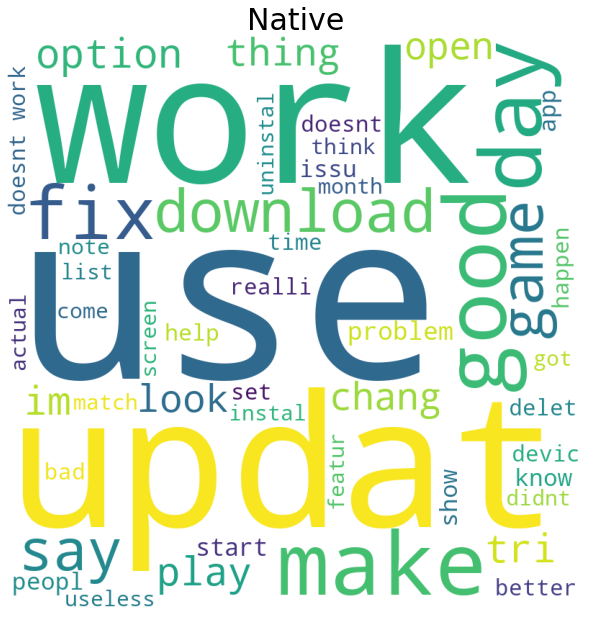

In [120]:
# df_combined_native = loadDataTest("android/native/android_native_combined.csv")
# Cleaned_reviews_native = textCleaning(df_combined_native.loc[(df_combined_native.reviewer_ratings == 1) | (df_combined_native.reviewer_ratings == 2)], a_stop_words)
get_word_cloud(Cleaned_reviews_native, 'Native').show()

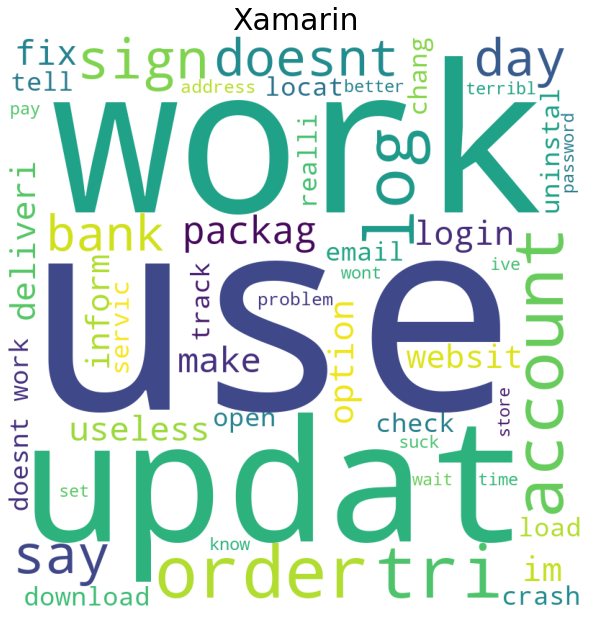

In [119]:
# df_combined_xamarin = loadDataTest("android/xamarin/android_xamarin_combined.csv")
# Cleaned_reviews_xamarin = textCleaning(df_combined_xamarin.loc[(df_combined_xamarin.reviewer_ratings == 1) | (df_combined_xamarin.reviewer_ratings == 2)], a_stop_words)
get_word_cloud(Cleaned_reviews_xamarin, "Xamarin").show()

In [73]:
def textCleaning(df, all_stop_words):

    df2 = df.copy()
    all_stop_words.update({"app", "phone", "android", "ios", ""} )
    stop_words = all_stop_words
    ps = PorterStemmer()
    combined_reviews = ""
    
    df3 = pd.DataFrame(columns=['review_body'])
    previous_app_name = ""
    for index, row in df2.iterrows():
    
        app_name = row['app_name']
        if(app_name != previous_app_name):
            print(app_name)
            stop_words = all_stop_words
            more_words = get_more_words(app_name)
            previous_app_name = app_name
            stop_words.update(more_words)
        
        row['review_body'] = row['review_body'].lower()
        row['review_body'] = re.sub(r'(<e>|<a>|</e>|</a>|<e/>|<a/>)', " ", row['review_body'])
        row['review_body'] = re.sub(r'[,.\/#!$%\^&\*;:{}=\'\-_`~()><:@"“”?]',"", row['review_body'])
        row['review_body'] = word_tokenize(row['review_body'])
        
#         print(row['review_body'])
        #stemming and stop word removal
        correct = ""
        for w in row['review_body']:  
            if (w in stop_words or len(w) == 1):
                continue
            w = ps.stem(w)
            correct += " " + w
            
        combined_reviews += correct
#         print(combined_reviews)
        
#         df3.loc[index] = [correct]
        
    return combined_reviews




def textCleaning_with_appname(df, app_name):

    df2 = df.copy()
    all_stop_words = set(stopwords.words('english'))
    all_stop_words.update({"app", "phone"})
    all_stop_words.update(get_more_words(app_name))
    ps = PorterStemmer()
    
    df3 = pd.DataFrame(columns=['review_body'])
    previous_app_name = ""
    for index, row in df2.iterrows():
        
        row['review_body'] = row['review_body'].lower()
        row['review_body'] = re.sub(r'(<e>|<a>|</e>|</a>|<e/>|<a/>)', " ", row['review_body'])
        row['review_body'] = re.sub(r'[,.\/#!$%\^&\*;:{}=\'\-_`~()><:@"“”?]',"", row['review_body'])
        row['review_body'] = word_tokenize(row['review_body'])
            
        #stemming and stop word removal
        correct = ""
        for w in row['review_body']: 
            
            if (w in all_stop_words or len(w) == 1):
                continue
            w = ps.stem(w)
            correct += " " + w
              
        df3.loc[index] = [correct]
        
    return df3

In [118]:
 def get_word_cloud(Cleaned_reviews, title):
#     comment_words = " "
#     for index, row in Cleaned_reviews.iterrows():
#         comment_words = comment_words+Cleaned_reviews.loc[index]['review_body'] + " "

    font = {
        'weight': 'normal',
        'size': 30,
        }
        

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
    #                 stopwords = stopwords, 
                    min_font_size = 10, max_words = 50).generate(Cleaned_reviews)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontdict = font)

    return plt

In [75]:
def get_more_words(app_name):
    new_words = set()
    new_words.add(app_name)
    new_words.add(app_name.lower())
    
    name_list = app_name.split()
    initials = ""
    for words_in_name in name_list:
        new_words.add(words_in_name)
        new_words.add(words_in_name.lower())
        initials += words_in_name[0]
        
    new_words.add(initials.lower())
    new_words.add(initials.upper())

    return new_words
    

In [76]:
a_stop_words = set(["every", "everytime", "time" ,"way", "need", "want", "a", "about", "above", "above", "across", "after", "afterwards","dont" "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"'a','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn','dont', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])